# Introduction to Matplotlib

In [ ]:
import matplotlib.pyplot as plt # same as always

In [2]:
%matplotlib inline

[]

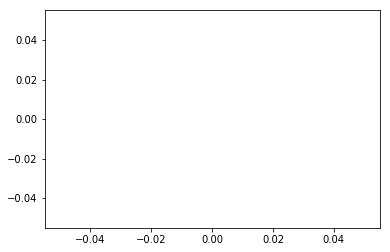

In [3]:
plt.plot()

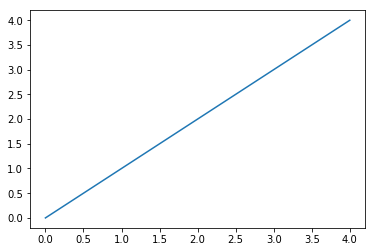

In [4]:
plt.plot(range(5))

In [5]:
import numpy as np

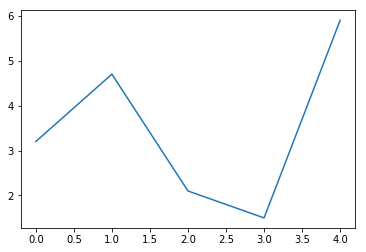

In [7]:
ratings = [3.2, 4.7, 2.1, 1.5, 5.9]
plt.plot(ratings)

<Container object of 5 artists>

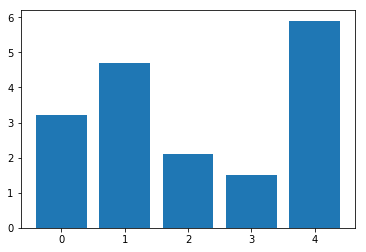

In [8]:
plt.bar(range(len(ratings)), ratings)

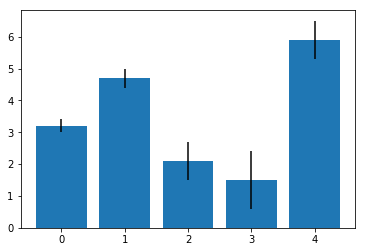

In [10]:
stds = [ 0.2,  0.3,  0.6,  0.9,  0.6]
plt.bar(range(len(ratings)), ratings, yerr=stds)
plt.savefig("./fig.pdf", dpi = 600)

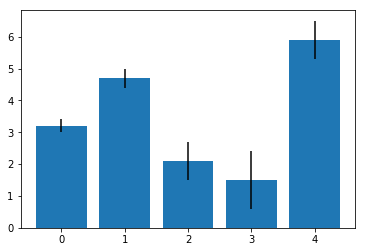

In [11]:
plt.bar(range(len(ratings)), ratings, yerr=stds)
plt.savefig("./fig.png", dpi = 600, bbox_inches='tight',transparent=True, pad_inches=0)

# Function Plot

In [12]:
import numpy as np
np.pi

3.141592653589793

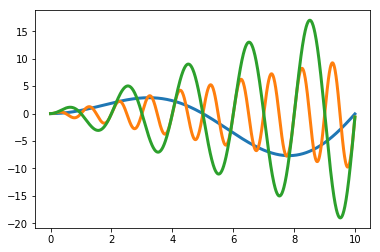

In [15]:
x = np.arange(0,10,0.01)

y = x * np.sin(0.2*np.pi*x)
plt.plot(x, y, linewidth=3)

y = x * np.sin(2*np.pi*x)
plt.plot(x, y, linewidth=3)

y = 2 * x * np.sin(np.pi*x)
plt.plot(x, y, linewidth=3)

plt.show()

# Paper Ready Example 1

In [16]:
import pandas as pd

In [17]:
dfM = pd.read_csv("./dataset_2/mean.csv", index_col=0)
dfM = dfM.transpose()
dfM

,HeartBubbles,HeartLight,HeartButton
Clear and Easy \nto Interpret,6.0,5.0,7.0
Fun and Enjoyable \nto Use,6.0,5.0,4.0
Close and Connected \nto Chat Partner,4.0,3.5,4.0
Understanding State \nof Chat Partner,4.5,4.0,4.0


In [19]:
dfM.describe()

,HeartBubbles,HeartLight,HeartButton
count,4.000000,4.000,4.00
mean,5.125000,4.375,4.75
std,1.030776,0.750,1.50
min,4.000000,3.500,4.00
25%,4.375000,3.875,4.00
50%,5.250000,4.500,4.00
75%,6.000000,5.000,4.75
max,6.000000,5.000,7.00


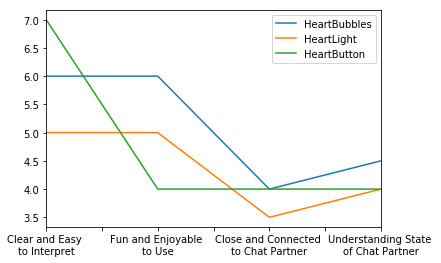

In [18]:
dfM.plot()

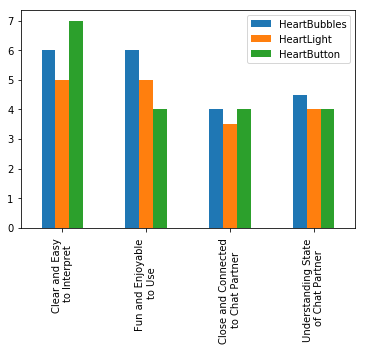

In [20]:
dfM.plot(kind="bar")

In [21]:
dfStd = pd.read_csv("./dataset_2/std.csv", index_col=0)
dfStd = dfStd.transpose()
dfStd

Std,HeartBubbles,HeartLight,HeartButton
Clear and Easy \nto Interpret,0.621582,1.356801,1.311372
Fun and Enjoyable \nto Use,1.128152,1.564279,1.658312
Close and Connected \nto Chat Partner,1.831955,1.505042,1.164500
Understanding State \nof Chat Partner,1.850471,1.443376,1.443376


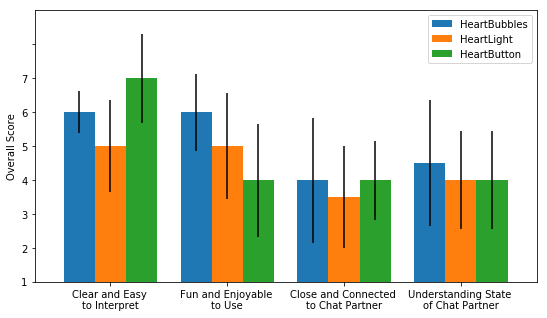

In [22]:

bar_width = 0.8
xticks = np.arange(len(dfM))

dfM.plot(kind="bar", width=bar_width, yerr=dfStd, figsize=(9,5))#, color=["b","y","g"])

lxticks = [u'Clear and Easy \nto Interpret',
           u'Fun and Enjoyable \nto Use',
           u'Close and Connected \nto Chat Partner',
           u'Understanding State \nof Chat Partner']
plt.xticks(xticks, tuple(lxticks),  rotation='horizontal')

plt.ylim(1,9)
plt.yticks(range(1,9), range(1,8))
plt.ylabel('Overall Score')

# Paper Ready Example 2

In [41]:
df = pd.read_csv("./dataset_3/times.csv")
df['time'] = df['time'] / 1000
df.head()

,id,group,side,condition,time
0,6,1,0,0,4.699
1,7,2,0,1,12.144
2,17,4,0,0,2.421
3,10,5,0,1,16.224
4,15,7,0,1,10.287


## Grouping

In [42]:
g1 = df.groupby([df.condition, df.side])
g1

In [43]:
g1.mean()

id  group     time
condition side                      
0         0     15.8    7.0  12.5976
          1     15.8    7.0  48.1338
1         0     10.0    6.8   8.6542
          1     10.0    6.8  20.6600

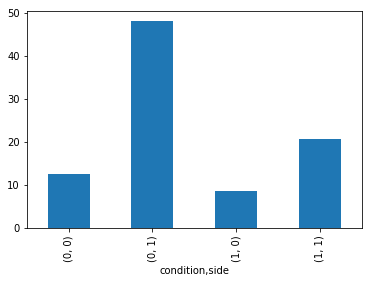

In [45]:
fig, ax = plt.subplots()
ax = g1["time"].mean().plot(kind="bar")

(-0.5, 3.5)

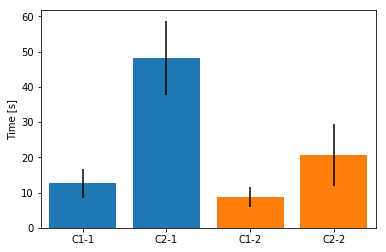

In [50]:
fig, ax = plt.subplots()
mean = g1["time"].mean().tolist()
sem = g1["time"].sem().tolist()

ax.set_xlim(-0.1,3.9)

ax.bar([0,1], mean[:2], yerr=sem[:2])#, color="blue")

ax.bar([2,3], mean[2:], yerr=sem[2:]) #color="g")

ax.set_ylabel("Time [s]")
ax.set_xticks(np.array(range(0, 4, 1)))
ax.set_xticklabels(["C1-1", "C2-1", "C1-2", "C2-2"])
plt.xlim(-0.5, 3.5)

# Paper Ready Example 3

In [51]:
N = 4
PMeans = (0.372, 0.936, 0.986, 0.389)
PSD =    (0.042, 0.003, 0.001, 0.149)
RMeans = (0.148, 0.871, 0.775, 0.297)
RSDs =   (0.008, 0.009, 0.020, 0.036)
FMeans = (0.224, 0.907, 0.870, 0.348) 
FSDs =   (0.016, 0.003, 0.008, 0.101)

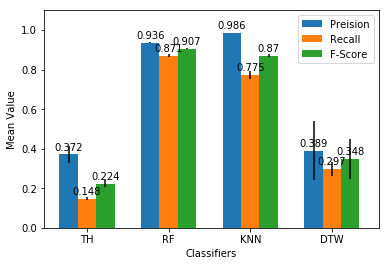

CPU times: user 276 ms, sys: 236 ms, total: 512 ms
Wall time: 241 ms


In [52]:
%%time
ind = np.arange(N)  # the x locations for the groups
w = 0.9
width = w/N       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, PMeans, width, yerr=PSD)#, facecolor='y',  color='black')
rects2 = ax.bar(ind+width, RMeans, width, yerr=RSDs)#, color='b')
rects3 = ax.bar(ind+2*width, FMeans, width, yerr=FSDs)#,  color='r')

ax.set_xlim(-0.3, 3.8)
ax.set_ylim(0.0, 1.1)
ax.set_ylabel('Mean Value')
ax.set_xlabel('Classifiers')
ax.set_xticks(ind+w*0.25)
ax.set_xticklabels( ('TH', 'RF', 'KNN', 'DTW') )

ax.legend( (rects1[0], rects2[0], rects3[0]), ('Preision', 'Recall', 'F-Score') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 0.01+height, height, ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()